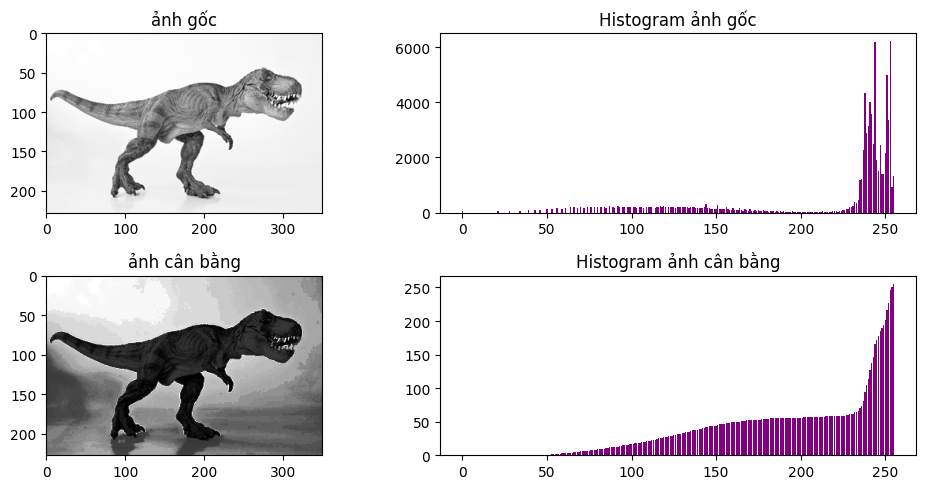

In [22]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
#b1
def calculate_histogram(image):
    # Khởi tạo một mảng có kích thước 256 (0-255) để lưu trữ histogram
    histogram = np.zeros((256,), dtype=np.uint32)
    # Lặp qua từng pixel trong ảnh và tăng giá trị histogram tương ứng
    for row in image:
        for pixel_value in row:
            histogram[pixel_value] += 1
    return histogram
#b2
def equalize_histogram(image, histogram):
    # Tính tổng số lượng pixel trong ảnh
    total_pixels = image.size
    # Tạo một mảng để tích lũy histogram cân bằng
    equalized_histogram = np.zeros((256,), dtype=np.uint32)
    # Tích lũy histogram cân bằng
    sum = 0
    for i in range(256):
        sum += histogram[i]
        equalized_histogram[i] = sum * 255 // total_pixels
    # Áp dụng histogram cân bằng để tạo ra ảnh đã cân bằng
    equalized_image = equalized_histogram[image]
    return equalized_image, equalized_histogram
#b3
def calculate_probability(histogram, total_pixels):
    probability = histogram / total_pixels
    return probability
#b4
def cumulative_distribution(probability):
    cumulative_dist = np.cumsum(probability)
    return cumulative_dist * 255

image = cv2.imread('D:/trex.png',0)

# Tính histogram của ảnh gốc
original_histogram = calculate_histogram(image)
total_pixels = image.size
# Cân bằng histogram

probability = calculate_probability(original_histogram, total_pixels)
cdf = cumulative_distribution(probability)
rounded_cdf = np.round(cdf).astype(np.uint8)
equalized_image = rounded_cdf[image]
equalized_image, equalized_histogram = equalize_histogram(image, original_histogram)

# Vẽ biểu đồ histogram của ảnh gốc
plt.figure(figsize=(10, 5))
plt.subplot(2, 2, 1)
plt.title('ảnh gốc')
plt.imshow(image,cmap='gray')
plt.subplot(2, 2, 2)
plt.title('Histogram ảnh gốc')
plt.bar(np.arange(256), original_histogram, color='purple')

# Vẽ biểu đồ histogram của ảnh đã cân bằng
plt.subplot(2, 2, 3)
plt.title('ảnh cân bằng')
plt.imshow(equalized_image, cmap='gray')
plt.subplot(2, 2, 4)
plt.title('Histogram ảnh cân bằng')
plt.bar(np.arange(256), equalized_histogram, color='purple')

plt.tight_layout()
plt.show()
